# Case Study 2 - Languages Processing

## Counting words

### Define Text

In [82]:
text_proof = "This is my test text. We´re keeping this short to keep things manageable."

### "count_words" Function

In [83]:
def count_words(text):
    """
    
    """

    text = text.lower()
    word_counts = {}
    
    for word in text.split(" "):

        if word  in word_counts:
            word_counts[word] += 1

        else:
            word_counts [word] = 1
    
    return word_counts

print(count_words(text_proof))

{'this': 2, 'is': 1, 'my': 1, 'test': 1, 'text.': 1, 'we´re': 1, 'keeping': 1, 'short': 1, 'to': 1, 'keep': 1, 'things': 1, 'manageable.': 1}


### "count_word_fast" Funtion

In [84]:
def count_words_fast(text):
    """
    
    """

    text = text.lower()

    skips = [".", ",", ";", ":", "´", '"', "'",]
    for character in skips: 
        text = text.replace(character, "")

    word_counts = {}
    
    for word in text.split(" "):

        if word  in word_counts:
            word_counts[word] += 1

        else:
            word_counts [word] = 1
    
    return word_counts

print(count_words_fast(text_proof))

{'this': 2, 'is': 1, 'my': 1, 'test': 1, 'text': 1, 'were': 1, 'keeping': 1, 'short': 1, 'to': 1, 'keep': 1, 'things': 1, 'manageable': 1}


### Pruebas

In [85]:
len(count_words("This comprehension check is to check for comprehension."))

7

In [86]:
count_words(text_proof) is count_words_fast(text_proof)

False

## Reading a Book


### text

In [87]:
text_english = ('./library/English/shakespeare/Romeo and Juliet.txt')
text_german = ('./library/German/shakespeare/Romeo und Julia.txt')

### "read_book" Function

In [88]:
def read_book(title_path):
    """
    Read a book and it as a string.
    """

    with open(title_path, "r", encoding="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    
    return text

print(len(read_book(text_english)))


169275


## Compouting Word Frequency Statistics

### "word_stats" Function

In [89]:
def word_stats(word_counts):
    """
    Return number of unique words and word frequences
    """

    num_unique = len(word_counts)
    counts = word_counts.values()

    return (num_unique, counts)

In [90]:
word_counts = count_words_fast(read_book(text_german))
num_unique, counts = word_stats(word_counts)

print(word_counts)
print(num_unique)
print(sum(counts))

{'\ufeffthe': 1, 'project': 33, 'gutenberg': 27, 'ebook': 23, 'of': 58, 'romeo': 62, 'und': 299, 'julia': 22, 'by': 22, 'william': 3, 'shakespeare(#16': 1, 'in': 170, 'our': 10, 'series': 1, 'shakespeare)copyright': 1, 'laws': 2, 'are': 17, 'changing': 1, 'all': 13, 'over': 3, 'the': 76, 'world': 2, 'be': 19, 'sure': 1, 'to': 62, 'check': 4, 'thecopyright': 1, 'for': 22, 'your': 13, 'country': 1, 'before': 2, 'downloading': 1, 'or': 47, 'redistributingthis': 1, 'any': 17, 'other': 19, 'ebookthis': 1, 'header': 2, 'should': 3, 'first': 3, 'thing': 1, 'seen': 1, 'when': 2, 'viewing': 1, 'this': 27, 'projectgutenberg': 2, 'file': 5, '': 735, 'please': 3, 'do': 9, 'not': 13, 'remove': 2, 'it': 20, 'change': 1, 'edit': 1, 'theheader': 1, 'without': 3, 'written': 2, 'permissionplease': 1, 'read': 3, 'legal': 3, 'small': 9, 'print': 1, 'and': 36, 'information': 5, 'about': 8, 'theebook': 1, 'at': 6, 'bottom': 1, 'included': 2, 'isimportant': 1, 'specific': 1, 'rights': 1, 'restrictions': 1, '

## Reading Multiple Files

### Libraries

In [91]:
import os
import pandas as pd

### Directories - Data Frames

In [92]:
book_dir = ("./library")

stats = pd.DataFrame(columns= ("language", "author", "title", "length", "unique"))
title_num = 1

### For Loop

In [93]:
for language in os.listdir(book_dir):
    language_path = os.path.join(book_dir, language)
    if not os.path.isdir(language_path):
        continue
    for author in os.listdir(language_path):
        author_path = os.path.join(language_path, author)
        if not os.path.isdir(author_path):
            continue
        for title in os.listdir(author_path):
            title_path = os.path.join(author_path, title)
            if os.path.isfile(title_path):
                print(title_path)

                
                text_books = read_book(title_path)
                book_word_counts = count_words_fast(read_book(title_path))
                num_unique, counts = word_stats(book_word_counts)
                stats.loc[title_num] = language, author, title, sum(counts), num_unique
                title_num += 1

./library/English/shakespeare/Hamlet.txt
./library/English/shakespeare/Romeo and Juliet.txt
./library/English/shakespeare/Othello.txt
./library/English/shakespeare/A Midsummer Night's Dream.txt
./library/English/shakespeare/The Merchant of Venice.txt
./library/English/shakespeare/Richard III.txt
./library/English/shakespeare/Macbeth.txt
./library/French/diderot/Regrets sur ma vieille robe de chambre.txt
./library/French/diderot/Ceci n'est pas un conte.txt
./library/French/diderot/Les deux amis de Bourbonne.txt
./library/French/diderot/L'oiseau blanc.txt
./library/French/diderot/Entretien d'un päre avec ses enfants.txt
./library/French/sand/Jacques le fataliste et son maåtre.txt
./library/French/sand/cora.txt
./library/French/sand/La Marquise.txt
./library/French/sand/Metella.txt
./library/French/sand/La Coupe; Lupo Liverani; Le Toast; Garnier; Le Contrebandier; La Ràverie Ö Paris.txt
./library/French/sand/Oeuvres illustrÇes de George Sand.txt
./library/French/sand/Mattea.txt
./library/

./library/Portuguese/Queir¢s/A Rel°quia.txt
./library/Portuguese/Queir¢s/O Primo Bazilio.txt
./library/Portuguese/Queir¢s/O crime do padre Amaro.txt
./library/Portuguese/Queir¢s/A Illustre Casa de Ramires.txt
./library/German/lessing/hamburgische dramaturgie.txt
./library/German/lessing/minna von barnhelm.txt
./library/German/lessing/miss sara sampson.txt
./library/German/lessing/der freigeist.txt
./library/German/lessing/die juden.txt
./library/German/lessing/philotas.txt
./library/German/lessing/der junge gelehrte.txt
./library/German/lessing/emilia galotti.txt
./library/German/schiller/Turandot, Prinzessin von China.txt
./library/German/schiller/Die Verschwîrung des Fiesco zu Genua.txt
./library/German/schiller/Die Jungfrau von Orleans.txt
./library/German/schiller/Die Piccolomini.txt
./library/German/schiller/Der Parasit, oder die Kunst, sein GlÅck zu machen.txt
./library/German/schiller/Die Huldigung der KÅnste.txt
./library/German/schiller/Wallensteins Tod.txt
./library/German/sc

### Pruebas

In [94]:
stats

,language,author,title,length,unique
1,English,shakespeare,Hamlet.txt,28551,6776
2,English,shakespeare,Romeo and Juliet.txt,40776,5118
3,English,shakespeare,Othello.txt,26590,5898
4,English,shakespeare,A Midsummer Night's Dream.txt,16103,4345
5,English,shakespeare,The Merchant of Venice.txt,20949,4978
...,...,...,...,...,...
98,German,shakespeare,Romeo und Julia.txt,20311,7527
99,German,shakespeare,Othello.txt,16568,6793
100,German,shakespeare,Ein Sommernachtstraum.txt,16648,6444
101,German,shakespeare,Richard III.txt,25888,9191


## Plotting Book Statistics

### Libraries

In [95]:
import matplotlib.pyplot as plt

In [96]:
stats.length

1      28551
2      40776
3      26590
4      16103
5      20949
       ...  
98     20311
99     16568
100    16648
101    25888
102    19311
Name: length, Length: 102, dtype: int64

### Plot

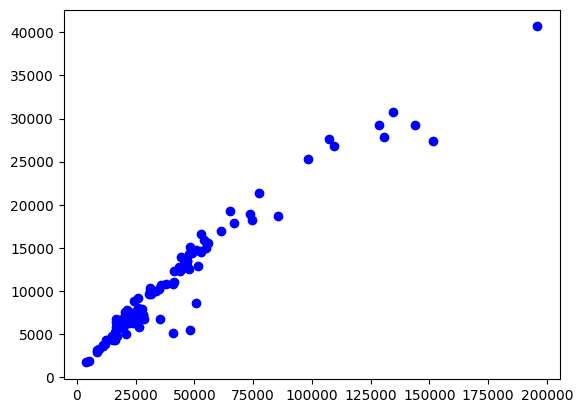

In [97]:
plt.plot(stats.length, stats.unique, "bo")